1 K:  0.956
2 K:  0.948
3 K:  0.972
4 K:  0.964
5 K:  0.948
6 K:  0.968
7 K:  0.956
8 K:  0.972
9 K:  0.980
10 K:  0.960
11 K:  0.968
12 K:  0.968
13 K:  0.948
14 K:  0.972
15 K:  0.956
16 K:  0.964
17 K:  0.968
18 K:  0.972
19 K:  0.932
20 K:  0.956


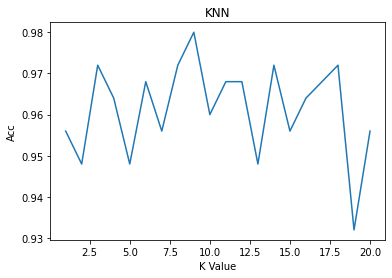

In [20]:
import csv
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

def openData():
    X = []
    y = []
    z= 0
    with open('iris.data', 'r') as csvfile:
        lines = csv.reader(csvfile)
        for row in lines:
            if z <=149:
                X.append(row[:4])
                y.append(row[4])
                z+=1
    return X,y

def split(X,y):
    from sklearn.model_selection import train_test_split
    return train_test_split(X,y,test_size=0.33)

def kNN(X_train,X_test,y_train,y_test,k):
    from warnings import simplefilter
    # ignore all future warnings
    simplefilter(action='ignore', category=FutureWarning)
    score = {}
    scoreList = []
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train,y_train)
    yPred = neigh.predict(X_test)
    score[k] = metrics.accuracy_score(y_test,yPred)
    scoreList.append(metrics.accuracy_score(y_test,yPred))
    return scoreList

def main():
    finalList = [] 
    X,y = openData()
    for k in range(1,21):
        tempList = []
        #Repeating step 1-5 for each K
        for k_value in range(5):
            X_train,X_test,y_train,y_test = split(X,y)
            tempList.append(kNN(X_train,X_test,y_train,y_test,k))
        #Computing avg of K
        avg_for_k = 0 
        for x in range(5):
            avg_for_k = avg_for_k + tempList[x][0]
        avg_for_k /= 5
            
        finalList.append(avg_for_k)
    #printing K avg for each K  
    num = 1
    for x in finalList:
        print(num,"K: ","{0:.3f}".format(x))
        num+=1
          
    #line graph
    k_range = range(1,21)
    %matplotlib inline
    ax=plt.axes()
    ax.plot(k_range,finalList)
    ax.set(title ="KNN",xlabel="K Value",ylabel="Acc")

main()